In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 
from scipy.optimize import curve_fit
#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 23
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [104]:
from ion_properties import lead,calcium,xenon,xenon2nd


Also plot dp/p

In [115]:
ion_loop=xenon

data_cooling = np.load(f'results/transverse/{ion_loop.name}_cooling.npz')

delta_cooling = data_cooling['delta']
zeta_cooling = data_cooling['zeta']
state_cooling = data_cooling['state']
x_cooling = data_cooling['x'] 
time = data_cooling['time']
s_per_turn = data_cooling['s_per_turn']
px_cooling = data_cooling['px']
action_x_cooling = data_cooling['action_x']
action_y_cooling = data_cooling['action_y']
emittance_x_cooling = data_cooling['emittance_x']
rms_dp_p_cooling = np.std(delta_cooling, axis=1)

data_heating = np.load(f'results/transverse/{ion_loop.name}_heating.npz')

delta_heating = data_heating['delta']
zeta_heating = data_heating['zeta']
state_heating = data_heating['state']
x_heating = data_heating['x'] 
time = data_heating['time']
s_per_turn = data_heating['s_per_turn']
px_heating = data_heating['px']
action_x_heating = data_heating['action_x']
action_y_heating = data_heating['action_y']
emittance_x_heating = data_heating['emittance_x']
rms_dp_p_heating = np.std(delta_heating, axis=1)

data_heating2= np.load(f'results/transverse/{ion_loop.name}_heating2.npz')

delta_heating2 = data_heating2['delta']
action_x_heating2 = data_heating2['action_x']
emittance_x_heating2 = data_heating2['emittance_x']
rms_dp_p_heating2 = np.std(delta_heating2, axis=1)

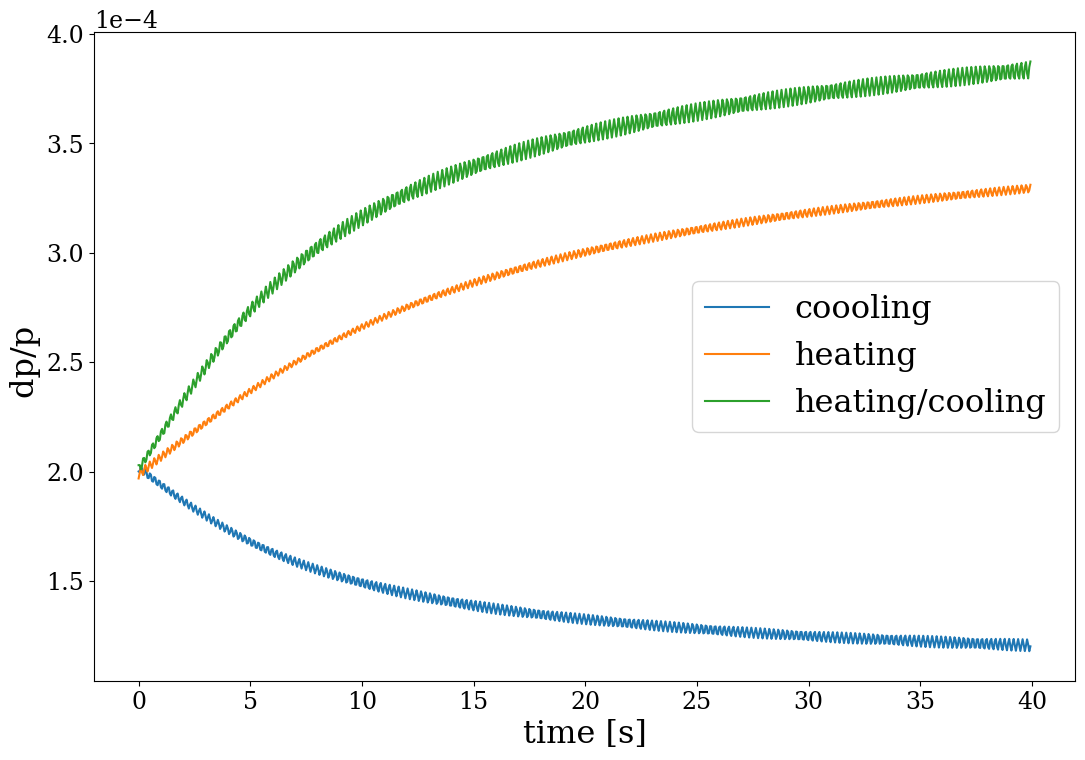

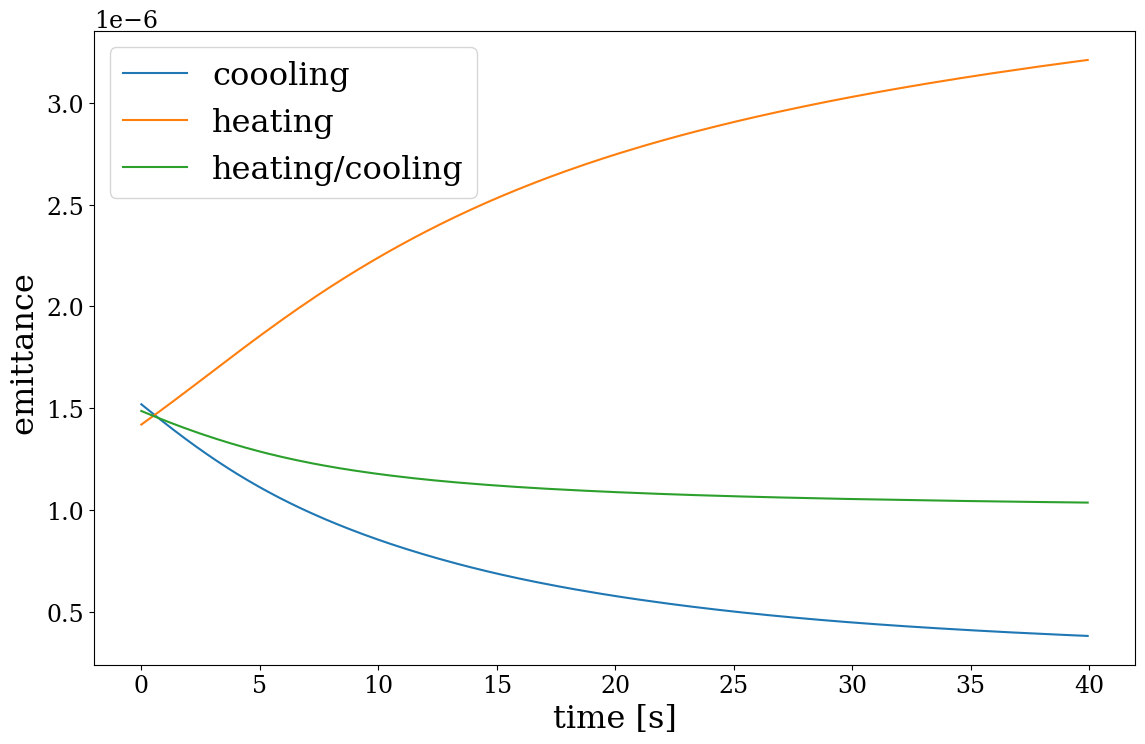

In [120]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(time,rms_dp_p_cooling,label='coooling') #turns,particles
plt.plot(time,rms_dp_p_heating,label='heating') #turns,particles
plt.plot(time,rms_dp_p_heating2,label='heating/cooling') #turns,particles
plt.xlabel('time [s]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.show()


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(time,emittance_x_cooling,label='coooling') #turns,particles
plt.plot(time,emittance_x_heating,label='heating') #turns,particles
plt.plot(time,emittance_x_heating2,label='heating/cooling') #turns,particles
plt.xlabel('time [s]')
plt.ylabel('emittance ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.show()

min_laser_offset: -2.142857142857143


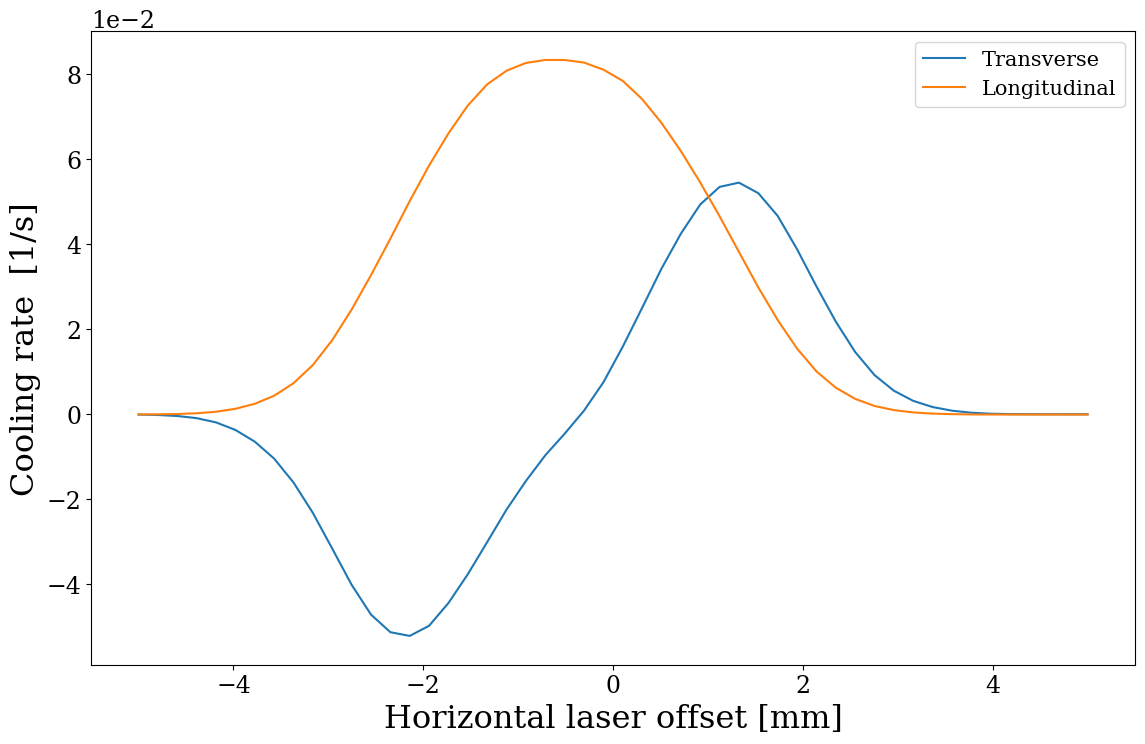

In [107]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

for ion_loop in [xenon]:# Ion properties:       
    data = np.load(f'results/optimal_laser_x/{ion_loop.name}_heating.npz')  # Replace 'ion_name' with the appropriate value

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    longitudinal_growth_rate_list = data['longitudinal_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(transverse_growth_rate_list)
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)
    
    
    plt.plot(laser_x_list*1e3,transverse_growth_rate_list,label=f'Transverse')    
    plt.plot(laser_x_list*1e3,longitudinal_growth_rate_list,label=f'Longitudinal')   
plt.xlabel('Horizontal laser offset [mm]')
plt.ylabel('Cooling rate  [1/s]')
ax = plt.gca()
# Removing the offset from the y-axis tick labels
ax.yaxis.get_major_formatter().set_useOffset(False)
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.axvline(-1.7346938775510203,color='red')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

min_laser_offset: -1.3265306122448979


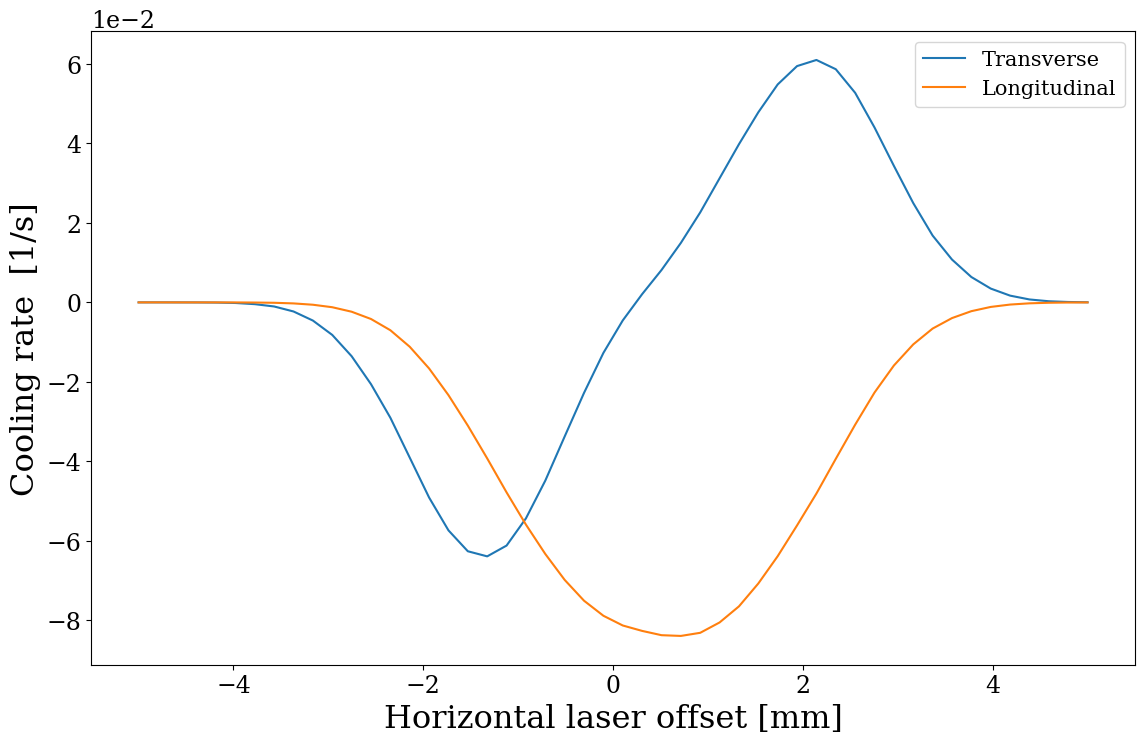

In [108]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

for ion_loop in [xenon]:# Ion properties:       
    data = np.load(f'results/optimal_laser_x/{ion_loop.name}_cooling.npz')  # Replace 'ion_name' with the appropriate value

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    longitudinal_growth_rate_list = data['longitudinal_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(transverse_growth_rate_list)
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)
    
    
    plt.plot(laser_x_list*1e3,transverse_growth_rate_list,label=f'Transverse')    
    plt.plot(laser_x_list*1e3,longitudinal_growth_rate_list,label=f'Longitudinal')   
plt.xlabel('Horizontal laser offset [mm]')
plt.ylabel('Cooling rate  [1/s]')
ax = plt.gca()
# Removing the offset from the y-axis tick labels
ax.yaxis.get_major_formatter().set_useOffset(False)
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.axvline(-1.7346938775510203,color='red')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

min_laser_offset: -1.5306122448979593


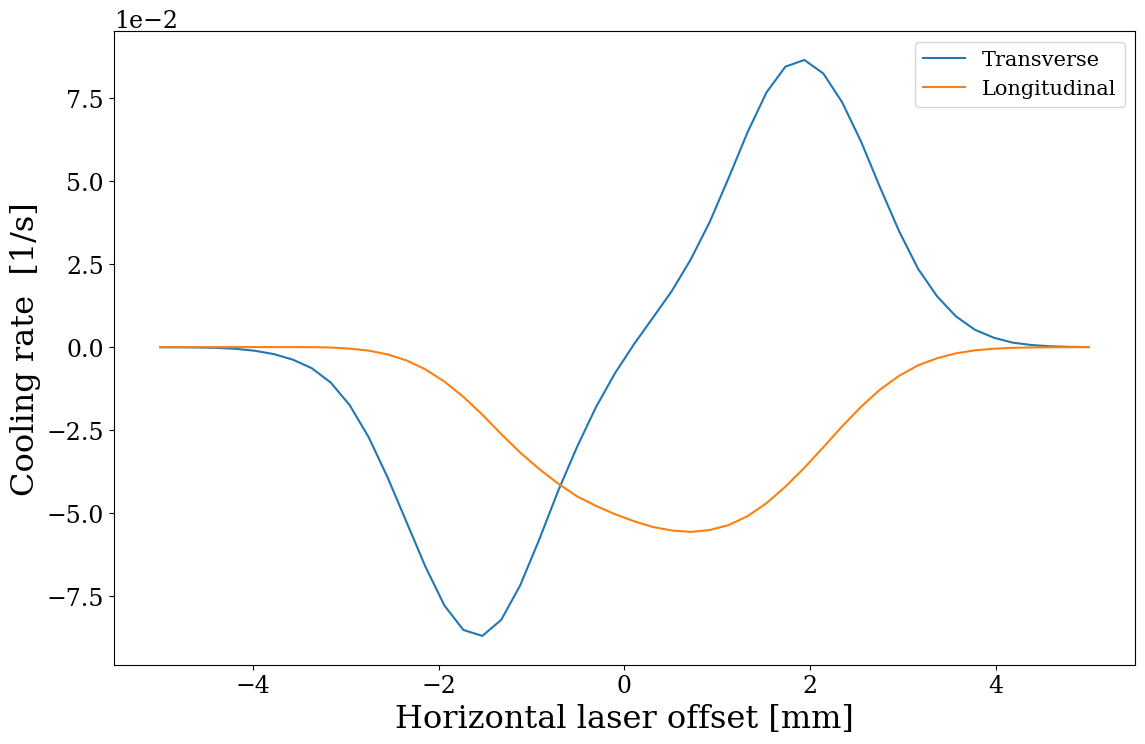

In [109]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

for ion_loop in [xenon]:# Ion properties:       
    data = np.load(f'results/optimal_laser_x/{ion_loop.name}.npz')  # Replace 'ion_name' with the appropriate value

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    longitudinal_growth_rate_list = data['longitudinal_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(transverse_growth_rate_list)
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)
    
    
    plt.plot(laser_x_list*1e3,transverse_growth_rate_list,label=f'Transverse')    
    plt.plot(laser_x_list*1e3,longitudinal_growth_rate_list,label=f'Longitudinal')   
plt.xlabel('Horizontal laser offset [mm]')
plt.ylabel('Cooling rate  [1/s]')
ax = plt.gca()
# Removing the offset from the y-axis tick labels
ax.yaxis.get_major_formatter().set_useOffset(False)
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.axvline(-1.7346938775510203,color='red')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

find the point with only transverse cooling and no longitudinal cooling

In [134]:
import numpy as np

# Load the saved data
data = np.load('results/2d_cooling_rates.npz')

# Extract the arrays
transverse_growth_rates = data['transverse_growth_rates']
longitudinal_growth_rates = data['longitudinal_growth_rates']
gamma_list = data['gamma_list']
laser_x_list = data['laser_x_list']

# Find indices where longitudinal growth rates are less than 0.02
longitudinal_zero_indices = np.where((longitudinal_growth_rates >= -10) & (longitudinal_growth_rates <= 10))

# Extract corresponding transverse growth rates
a = transverse_growth_rates[longitudinal_zero_indices]

# Find the index of the most negative value in a
index_of_min_neg = np.argmax(-a)

# Get the corresponding indices in gamma_list and laser_x_list
corresponding_indices_neg = np.unravel_index(longitudinal_zero_indices[0][index_of_min_neg], transverse_growth_rates.shape)

# Get the corresponding values of gamma and laser offset
corresponding_gamma_neg = gamma_list[corresponding_indices_neg[0]]
corresponding_laser_offset_neg = laser_x_list[corresponding_indices_neg[1]]

print("Most negative transverse growth rate value:", a[index_of_min_neg])
print("Corresponding gamma value:", corresponding_gamma_neg)
print("Corresponding laser offset value:", corresponding_laser_offset_neg*1e3)


Most negative transverse growth rate value: -0.08859877789684294
Corresponding gamma value: 152.500998975125
Corresponding laser offset value: -1.7346938775510203


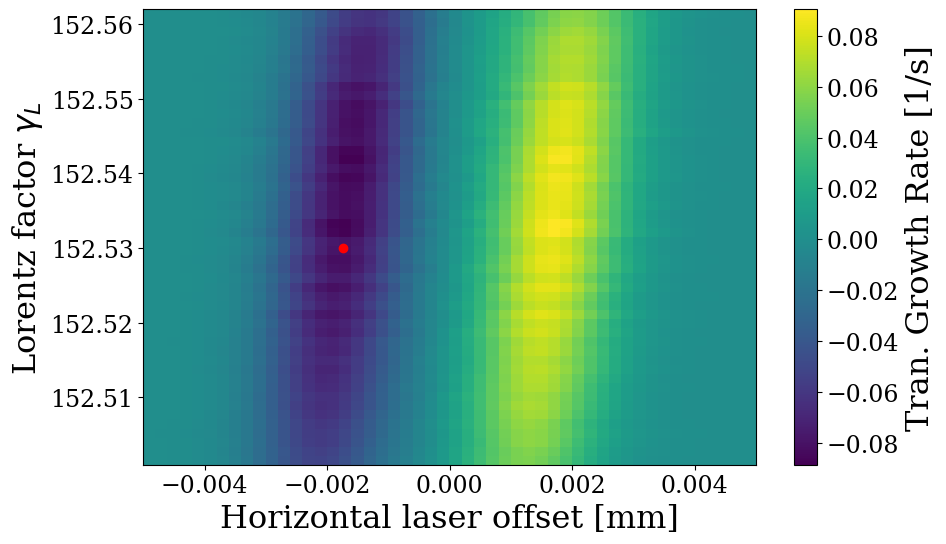

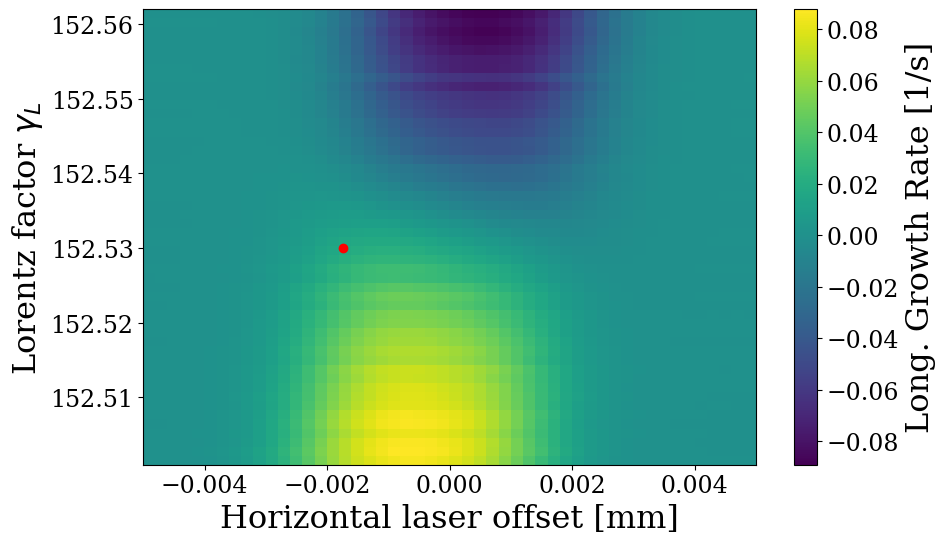

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved data
data = np.load('results/2d_cooling_rates.npz')

# Extract the arrays
transverse_growth_rates = data['transverse_growth_rates']
longitudinal_growth_rates = data['longitudinal_growth_rates']
gamma_list = data['gamma_list']
laser_x_list = data['laser_x_list']  # Convert to millimeters



# Plot the heatmap for transverse growth rates
plt.figure(figsize=(10, 6))
plt.imshow(transverse_growth_rates, extent=[laser_x_list[0], laser_x_list[-1], gamma_list[0], gamma_list[-1]], aspect='auto', cmap='viridis')
plt.colorbar(label='Tran. Growth Rate [1/s]')
plt.xlabel('Horizontal laser offset [mm]')
plt.ylabel('Lorentz factor $\\gamma_L$')

# Annotate the optimal point
plt.scatter(-1.7346938775510203*1e-3, 152.53, color='red', marker='o', label='Optimal Point')
# plt.legend()

plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.tight_layout()
plt.show()

# Plot the heatmap for longitudinal growth rates
plt.figure(figsize=(10, 6))
plt.imshow(longitudinal_growth_rates, extent=[laser_x_list[0], laser_x_list[-1], gamma_list[0], gamma_list[-1]], aspect='auto', cmap='viridis')
plt.colorbar(label='Long. Growth Rate [1/s]')
plt.xlabel('Horizontal laser offset [mm]')
plt.ylabel('Lorentz factor $\\gamma_L$')

# Annotate the optimal point
plt.scatter(-1.7346938775510203*1e-3, 152.53, color='red', marker='o', label='Optimal Point')
# plt.legend()

plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.tight_layout()
plt.show()


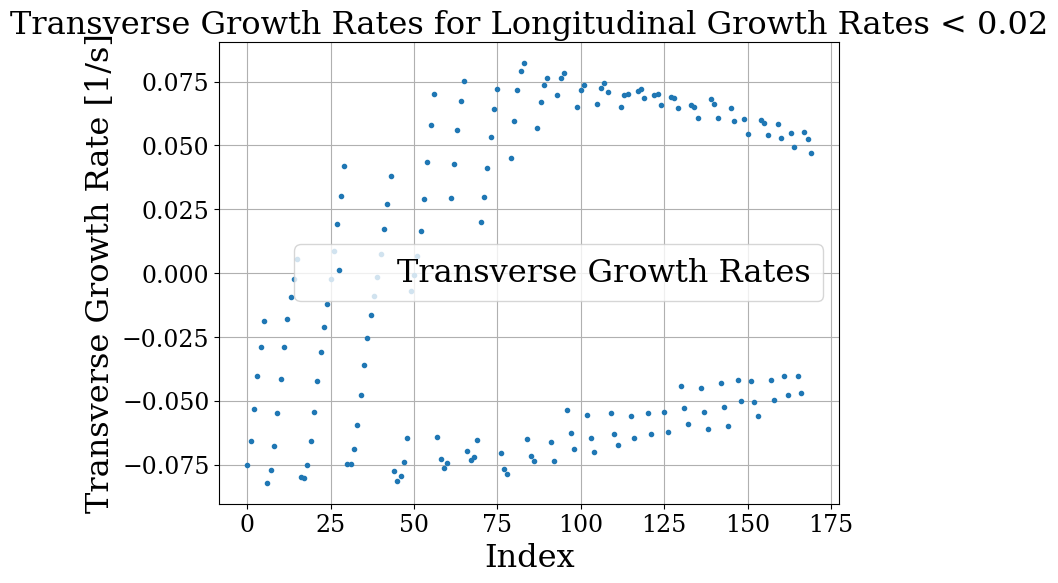

In [112]:
plt.figure(figsize=(8, 6))
plt.plot(a, 'o', markersize=3, label='Transverse Growth Rates')
plt.xlabel('Index')
plt.ylabel('Transverse Growth Rate [1/s]')
plt.title('Transverse Growth Rates for Longitudinal Growth Rates < 0.02')
plt.legend()
plt.grid(True)
plt.show()


slice on plane

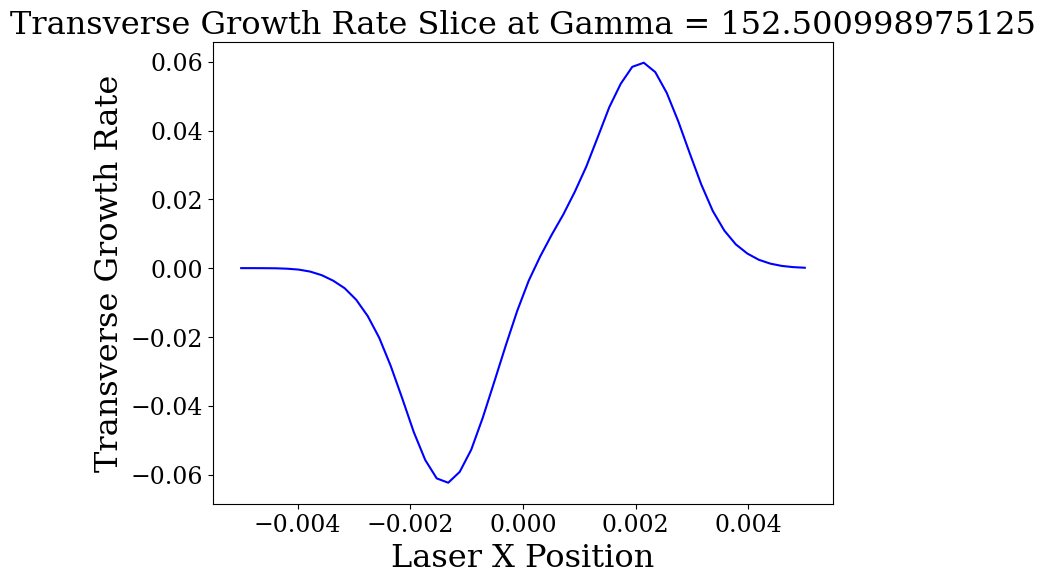

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved data
data = np.load('results/2d_cooling_rates.npz')

# Extract the arrays
transverse_growth_rates = data['transverse_growth_rates']
longitudinal_growth_rates = data['longitudinal_growth_rates']
gamma_list = data['gamma_list']
laser_x_list = data['laser_x_list']

# Choose the gamma value for the slice
gamma_value = gamma_list[0]  # Change this to the desired gamma value

# Find the index of the gamma value in the gamma list
gamma_index = np.abs(gamma_list - gamma_value).argmin()

# Plot the slice for transverse growth rates
plt.figure(figsize=(8, 6))
plt.plot(laser_x_list, transverse_growth_rates[gamma_index, :], color='blue')
plt.xlabel('Laser X Position')
plt.ylabel('Transverse Growth Rate')
plt.title(f'Transverse Growth Rate Slice at Gamma = {gamma_value}')
plt.show()
